In [9]:
#Optimiser les coefficients dans ton portefeuille d'actions
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [10]:
# Télécharger les données de prix pour plusieurs actifs
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Exemple avec quelques actions technologiques
data = yf.download(tickers, start='2010-01-01', end='2022-01-01')['Adj Close']

# Afficher les premières lignes des données
print(data.head())


[*********************100%%**********************]  4 of 4 completed

Ticker          AAPL    AMZN      GOOGL       MSFT
Date                                              
2010-01-04  6.461977  6.6950  15.666453  23.389400
2010-01-05  6.473148  6.7345  15.597464  23.396954
2010-01-06  6.370184  6.6125  15.204272  23.253374
2010-01-07  6.358409  6.5000  14.850323  23.011541
2010-01-08  6.400680  6.6760  15.048295  23.170244


In [11]:
# Calculer les rendements journaliers
returns = data.pct_change().dropna()

# Afficher les premières lignes des rendements
print(returns.head())


Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2010-01-05  0.001729  0.005900 -0.004404  0.000323
2010-01-06 -0.015906 -0.018116 -0.025209 -0.006137
2010-01-07 -0.001848 -0.017013 -0.023280 -0.010400
2010-01-08  0.006648  0.027077  0.013331  0.006897
2010-01-11 -0.008822 -0.024041 -0.001512 -0.012720


In [7]:
"""# Définir la cible de rendement quotidien moyen
target_return = 0.001

# Préparer les données pour la régression linéaire
X = returns.values #X est de shape nx4 car 4 parametres ici (d'info)
print(X.shape)
y = np.full(X.shape[0], target_return)
print(X)
print(y) #y c'est ce quon veut prédire"""



(3020, 4)
[[ 0.00172878  0.00589989 -0.00440366  0.00032293]
 [-0.01590631 -0.01811563 -0.02520867 -0.00613667]
 [-0.00184846 -0.01701326 -0.02327961 -0.0103999 ]
 ...
 [ 0.00050204 -0.00855492 -0.00021818  0.00205138]
 [-0.0065783  -0.00328901 -0.00309911 -0.00769145]
 [-0.00353509 -0.0114294  -0.00922364 -0.00884087]]
[0.001 0.001 0.001 ... 0.001 0.001 0.001]


In [8]:
"""# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Extraire les coefficients du modèle (pondérations optimales)
weights = model.coef_

# Afficher les pondérations optimales
for ticker, weight in zip(tickers, weights):
    print(f'{ticker}: {weight:.4f}')"""

AAPL: -0.0000
MSFT: -0.0000
GOOGL: -0.0000
AMZN: 0.0000


In [12]:
#On a vu que définir un rendement fixe journalier c'est pas dingue
#A la place, on peut se donner un rendement variable, comme celui d'un ETF
#But : coller l'indice de reference. Donner des poids tq on se rapproche le + de ces rendements

In [13]:
sp500 = yf.download('^GSPC', start='2010-01-01', end='2022-01-01')['Adj Close']
print(sp500.head())
sp500_returns = sp500.pct_change().dropna()
#Pour indexer correctement :
returns = returns.loc[sp500_returns.index]
sp500_returns = sp500_returns.loc[returns.index]

[*********************100%%**********************]  1 of 1 completed

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
Name: Adj Close, dtype: float64


In [14]:
# Afficher les premières lignes des rendements
print(returns.head())
print(sp500_returns.head())

Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2010-01-05  0.001729  0.005900 -0.004404  0.000323
2010-01-06 -0.015906 -0.018116 -0.025209 -0.006137
2010-01-07 -0.001848 -0.017013 -0.023280 -0.010400
2010-01-08  0.006648  0.027077  0.013331  0.006897
2010-01-11 -0.008822 -0.024041 -0.001512 -0.012720
Date
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
2010-01-11    0.001747
Name: Adj Close, dtype: float64


In [15]:
# Diviser les données en caractéristiques (X) et cible (y)
X = returns.values
y = sp500_returns.values
print(X.shape)
print(y.shape)



(3020, 4)
(3020,)


In [16]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [17]:
# Extraire les coefficients du modèle (pondérations optimales)
weights = model.coef_

# Afficher les pondérations optimales
for ticker, weight in zip(tickers, weights):
    print(f'{ticker}: {weight:.4f}')

AAPL: 0.1630
MSFT: 0.0432
GOOGL: 0.1684
AMZN: 0.2735


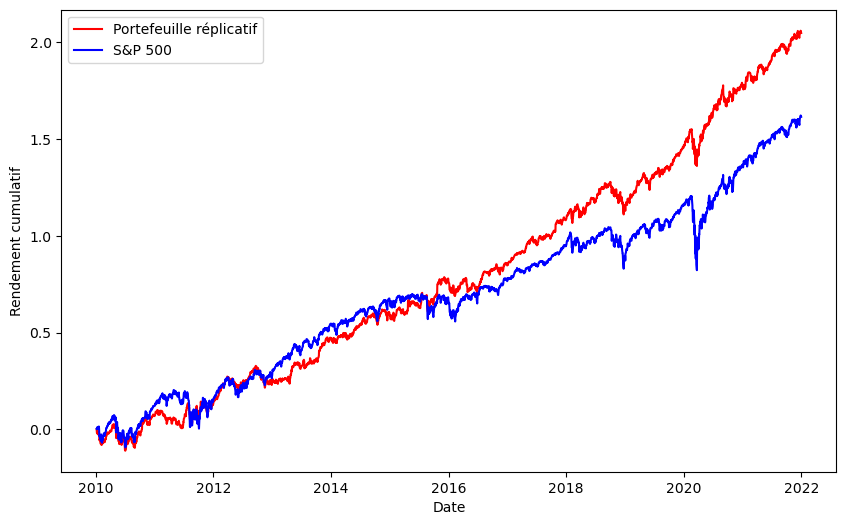

In [19]:
# Calculer les rendements du portefeuille optimisé (optimisation au sens de la réplication)
portfolio_returns = returns.dot(weights)

# Comparer les rendements du portefeuille optimisé avec ceux de l'indice de référence
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(portfolio_returns), label='Portefeuille réplicatif', color='red')
plt.plot(np.cumsum(sp500_returns), label='S&P 500', color='blue')
plt.xlabel('Date')
plt.ylabel('Rendement cumulatif')
plt.legend()
plt.show()
